In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [4]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

# 데이터 전처리

## 2023년 월별 데이터 병합

In [64]:
import pandas as pd
import numpy as np

# 파일 경로
file_path = "./data/2023.{}월_29개 통신정보.xlsx"

# 1월부터 9월까지의 데이터를 읽어오는 리스트 생성
dataframes = [pd.read_excel(file_path.format(month)) for month in range(1, 10)]

# 각 데이터프레임을 하나로 합치기
combined_df = pd.concat(dataframes)
combined_df['성별'] = combined_df['성별'].replace({1:'M', 2:'F'})

In [66]:
# 숫자 데이터만 포함하는 열 선택
# numeric_df = combined_df.select_dtypes(include=[np.number])

# 동일한 위치의 셀들을 묶어 평균을 계산
average_df = combined_df.groupby(['자치구', '행정동', '성별','연령대']).mean()
average_df = average_df.reset_index()  # 계층형 인덱스 사용 안함
average_df

,자치구,행정동,성별,연령대,행정동코드,총인구수,1인가구수,야간상주지 변경 미추정 인구 수,야간상주지 변경횟수 평균,"야간상주지 변경횟수: 4분위수, 25%",...,배달_브랜드 서비스 사용 미추정 인구수,배달_브랜드 서비스 사용일수,"배달_브랜드 서비스 사용일수: 4분위수, 25%","배달_브랜드 서비스 사용일수: 4분위수, 50%","배달_브랜드 서비스 사용일수: 4분위수, 75%",배달_식재료 서비스 사용 미추정 인구수,배달_식재료 서비스 사용일수,"배달_식재료 서비스 사용일수: 4분위수, 25%","배달_식재료 서비스 사용일수: 4분위수, 50%","배달_식재료 서비스 사용일수: 4분위수, 75%"
0,강남구,개포1동,F,20,1123068.0,582.925556,97.008889,0.0,2.012222,1.0,...,562.245556,2.471111,2.224444,2.224444,2.964444,568.648889,1.113333,1.113333,1.113333,1.113333
1,강남구,개포1동,F,25,1123068.0,602.852222,111.268889,0.0,2.138889,1.0,...,574.118889,1.823333,1.670000,1.670000,2.038889,585.965556,1.298889,1.298889,1.298889,1.298889
2,강남구,개포1동,F,30,1123068.0,458.930000,108.732222,0.0,1.811111,1.0,...,427.324444,2.402222,1.670000,1.854444,2.777778,450.264444,1.484444,1.484444,1.484444,1.484444
3,강남구,개포1동,F,35,1123068.0,352.687778,78.151111,0.0,1.958889,1.0,...,327.118889,2.576667,1.670000,2.038889,2.776667,338.070000,1.670000,1.670000,1.670000,1.670000
4,강남구,개포1동,F,40,1123068.0,398.371111,42.562222,0.0,1.860000,1.0,...,369.315556,2.661111,1.670000,1.854444,3.702222,388.084444,1.670000,1.670000,1.670000,1.670000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10171,중랑구,중화2동,M,55,1107062.0,1401.283333,395.991111,0.0,1.600000,1.0,...,1384.336667,2.917778,1.670000,2.407778,4.257778,1391.136667,1.670000,1.670000,1.670000,1.670000
10172,중랑구,중화2동,M,60,1107062.0,966.955556,306.544444,0.0,1.652222,1.0,...,962.854444,2.376667,1.670000,1.670000,3.147778,965.982222,0.371111,0.371111,0.371111,0.371111
10173,중랑구,중화2동,M,65,1107062.0,717.738889,217.414444,0.0,1.487778,1.0,...,716.276667,0.864444,0.556667,0.741111,1.296667,717.212222,0.371111,0.371111,0.371111,0.371111
10174,중랑구,중화2동,M,70,1107062.0,451.097778,130.627778,0.0,1.427778,1.0,...,450.896667,0.000000,0.000000,0.000000,0.000000,448.672222,1.484444,1.484444,1.484444,1.484444


In [68]:
average_df
# 결과를 새로운 엑셀 파일로 저장
average_df.to_excel('./average.xlsx')

,자치구,행정동,성별,연령대,행정동코드,총인구수,1인가구수,야간상주지 변경 미추정 인구 수,야간상주지 변경횟수 평균,"야간상주지 변경횟수: 4분위수, 25%",...,배달_브랜드 서비스 사용 미추정 인구수,배달_브랜드 서비스 사용일수,"배달_브랜드 서비스 사용일수: 4분위수, 25%","배달_브랜드 서비스 사용일수: 4분위수, 50%","배달_브랜드 서비스 사용일수: 4분위수, 75%",배달_식재료 서비스 사용 미추정 인구수,배달_식재료 서비스 사용일수,"배달_식재료 서비스 사용일수: 4분위수, 25%","배달_식재료 서비스 사용일수: 4분위수, 50%","배달_식재료 서비스 사용일수: 4분위수, 75%"
0,강남구,개포1동,F,20,1123068.0,582.925556,97.008889,0.0,2.012222,1.0,...,562.245556,2.471111,2.224444,2.224444,2.964444,568.648889,1.113333,1.113333,1.113333,1.113333
1,강남구,개포1동,F,25,1123068.0,602.852222,111.268889,0.0,2.138889,1.0,...,574.118889,1.823333,1.670000,1.670000,2.038889,585.965556,1.298889,1.298889,1.298889,1.298889
2,강남구,개포1동,F,30,1123068.0,458.930000,108.732222,0.0,1.811111,1.0,...,427.324444,2.402222,1.670000,1.854444,2.777778,450.264444,1.484444,1.484444,1.484444,1.484444
3,강남구,개포1동,F,35,1123068.0,352.687778,78.151111,0.0,1.958889,1.0,...,327.118889,2.576667,1.670000,2.038889,2.776667,338.070000,1.670000,1.670000,1.670000,1.670000
4,강남구,개포1동,F,40,1123068.0,398.371111,42.562222,0.0,1.860000,1.0,...,369.315556,2.661111,1.670000,1.854444,3.702222,388.084444,1.670000,1.670000,1.670000,1.670000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10171,중랑구,중화2동,M,55,1107062.0,1401.283333,395.991111,0.0,1.600000,1.0,...,1384.336667,2.917778,1.670000,2.407778,4.257778,1391.136667,1.670000,1.670000,1.670000,1.670000
10172,중랑구,중화2동,M,60,1107062.0,966.955556,306.544444,0.0,1.652222,1.0,...,962.854444,2.376667,1.670000,1.670000,3.147778,965.982222,0.371111,0.371111,0.371111,0.371111
10173,중랑구,중화2동,M,65,1107062.0,717.738889,217.414444,0.0,1.487778,1.0,...,716.276667,0.864444,0.556667,0.741111,1.296667,717.212222,0.371111,0.371111,0.371111,0.371111
10174,중랑구,중화2동,M,70,1107062.0,451.097778,130.627778,0.0,1.427778,1.0,...,450.896667,0.000000,0.000000,0.000000,0.000000,448.672222,1.484444,1.484444,1.484444,1.484444


## 남, 녀 각각 자치구별 평균 연령대를 구한다.

In [69]:
data = pd.read_excel('./average.xlsx')

data['자치구/성별 연령대 총합'] = data['연령대'] * data['총인구수']

total = data.groupby(['자치구', '성별'])['총인구수'].sum()

average_age = pd.DataFrame()

average_age['평균 연령대'] = data.groupby(['자치구', '성별'])['자치구/성별 연령대 총합'].sum() / total

total = np.ceil(total).astype(int)

average_age['총인구수'] = total 

In [70]:
average_age = average_age.reset_index()

In [71]:
average_age

,자치구,성별,평균 연령대,총인구수
0,강남구,F,43.678562,232664
1,강남구,M,43.444475,206007
2,강동구,F,45.086388,186495
3,강동구,M,43.964831,178951
4,강북구,F,46.994863,138558
5,강북구,M,45.186516,129914
6,강서구,F,44.591378,242417
7,강서구,M,43.356225,226108
8,관악구,F,43.357594,222783
9,관악구,M,41.666981,225200


In [72]:
average_age.to_excel('./average_age.xlsx')

In [5]:
data = pd.read_excel('./average.xlsx')

data['자치구/성별 연령대 총합'] = data['연령대'] * data['총인구수']

total = data.groupby(['자치구'])['총인구수'].sum()

average_age = pd.DataFrame()

average_age['평균 연령대'] = data.groupby(['자치구'])['자치구/성별 연령대 총합'].sum() / total

total = np.ceil(total).astype(int)

average_age['총인구수'] = total 

average_age = average_age.reset_index()

In [6]:
average_age

,자치구,평균 연령대,총인구수
0,강남구,43.568631,438671
1,강동구,44.537185,365446
2,강북구,46.119801,268472
3,강서구,43.995298,468525
4,관악구,42.507726,447982
5,광진구,42.637420,308318
6,구로구,44.583487,370729
7,금천구,44.813454,213590
8,노원구,44.517242,447821
9,도봉구,45.606414,280114


## 자치구랑 연령대로 groupby sum 진행하고 연령대로 group by

In [74]:
data = pd.read_excel('./average.xlsx')

by_age = pd.DataFrame()

by_age['각 자치구별 연령대별 총 인구수'] = data.groupby(['자치구', '연령대'])['총인구수'].sum().apply(np.ceil).astype(int)
by_age = by_age.reset_index()

by_age
by_age.to_excel('./merge_f_m.xlsx')

,자치구,연령대,각 자치구별 연령대별 총 인구수
0,강남구,20,34343
1,강남구,25,41036
2,강남구,30,49927
3,강남구,35,45287
4,강남구,40,47638
...,...,...,...
295,중랑구,55,35265
296,중랑구,60,25763
297,중랑구,65,19569
298,중랑구,70,13395


In [76]:
# 성별 합치지 않고 하면
data = pd.read_excel('./average.xlsx')

age_most_region_notmerged = pd.DataFrame()
age_most_region_notmerged['총 인구수'] = data.groupby(['성별', '연령대', '자치구'])['총인구수'].sum().apply(np.ceil).astype(int)
age_most_region_notmerged = age_most_region_notmerged.reset_index().sort_values(by=['성별','연령대'])

age_most_region_notmerged

age_most_region_notmerged.to_excel('./age_most_region_notmerged.xlsx')

,성별,연령대,자치구,총 인구수
0,F,20,강남구,17150
1,F,20,강동구,13922
2,F,20,강북구,10885
3,F,20,강서구,18293
4,F,20,관악구,21381
...,...,...,...,...
595,M,75,용산구,5310
596,M,75,은평구,11074
597,M,75,종로구,3930
598,M,75,중구,2884


In [100]:
# 성별 합침
data = pd.read_excel('./average.xlsx')

age_most_region_notmerged = pd.DataFrame()
age_most_region_notmerged['총 인구수'] = data.groupby(['연령대', '자치구'])['총인구수'].sum().apply(np.ceil).astype(int)
age_most_region_notmerged = age_most_region_notmerged.reset_index().sort_values(by='연령대')

age_most_region_notmerged

age_most_region_notmerged.to_excel('./age_most_region.xlsx')

,연령대,자치구,총 인구수
0,20,강남구,34343
24,20,중랑구,28108
23,20,중구,9455
22,20,종로구,14222
21,20,은평구,30294
...,...,...,...
276,75,강동구,16899
275,75,강남구,20240
298,75,중구,7343
286,75,동작구,19947


In [101]:
data = pd.read_excel('./merge_f_m.xlsx')

def merge_age(age):
    return int((age // 10) * 10)

age_most_region = pd.DataFrame()
age_most_region['총 인구수'] = data.groupby(['연령대', '자치구'])['각 자치구별 연령대별 총 인구수'].mean()
age_most_region = age_most_region.reset_index().sort_values(by='연령대')
age_most_region['연령대'] = age_most_region['연령대'].apply(merge_age)

age_10 = pd.DataFrame()
age_10['총 인구수'] = age_most_region.groupby(['연령대', '자치구'])['총 인구수'].sum()
age_10['총 인구수'] = age_10['총 인구수'].apply(np.ceil).astype(int)
age_10 = age_10.reset_index().sort_values(by='연령대')
age_10

age_most_region.to_excel('./age_most_region_10.xlsx')
age_10.to_excel('./age_10.xlsx')

,연령대,자치구,총 인구수
0,20,강남구,75379
24,20,중랑구,57319
23,20,중구,20270
22,20,종로구,28573
21,20,은평구,61620
...,...,...,...
126,70,강동구,30467
125,70,강남구,35058
148,70,중구,11995
136,70,동작구,32740


In [22]:
# 연령대별 총 인구수 확인

data = pd.read_excel('./age_10.xlsx')

df = pd.DataFrame()

df['총 인구수'] = data.groupby('연령대')['총 인구수'].sum()

df['퍼센트'] = df['총 인구수'] / df['총 인구수'].sum()

df


,총 인구수,퍼센트
연령대,,
20,1479601,0.180171
30,1654051,0.201414
40,1668766,0.203206
50,1596594,0.194418
60,1040227,0.126669
70,772949,0.094122


## 성별별로 나눈 후 연령대(20, 30, 40...대)로 groupby 진행해서 총인구 수 가장 많은 자치구 순으로 그래프 (총 인구수 올림 처리)

In [81]:
data = pd.read_excel('./age_most_region_notmerged.xlsx')

def merge_age(age):
    return int((age // 10) * 10)

sex_age_region = pd.DataFrame()
sex_age_region['총 인구수'] = data.groupby(['성별', '연령대', '자치구'])['총 인구수'].mean()
sex_age_region = sex_age_region.reset_index().sort_values(by='연령대')
sex_age_region['연령대'] = sex_age_region['연령대'].apply(merge_age)

sex_age_10 = pd.DataFrame()
sex_age_10['총 인구수'] = sex_age_region.groupby(['성별', '연령대', '자치구'])['총 인구수'].sum()
sex_age_10['총 인구수'] = sex_age_10['총 인구수'].apply(np.ceil).astype(int)
sex_age_10 = sex_age_10.reset_index().sort_values(by=['성별', '연령대'])
sex_age_10

sex_age_10.to_excel('./sex_age_10.xlsx')

,성별,연령대,자치구,총 인구수
0,F,20,강남구,39615
1,F,20,강동구,29608
2,F,20,강북구,21138
3,F,20,강서구,40846
4,F,20,관악구,50112
...,...,...,...,...
295,M,70,용산구,8752
296,M,70,은평구,18315
297,M,70,종로구,6332
298,M,70,중구,4854


## 성별별로 서비스 컬럼만 포함한 df 생성

1. Aver 기준으로 자치구, 성별, 연령대, 서비스7개
- region_sex_age_services.xlsx
2. 연령대 10살 단위 통합
- 성별별로
- female_services, male_services
- 성별별로 z-value 변환
- specific_male_services, specific_female_services
3. 성별 통합
- services
- z-value 변환 
- zvalue_services



In [48]:
data = pd.read_excel('./average.xlsx')

df = pd.DataFrame()

df['자치구'] = data['자치구']
df['연령대'] = data['연령대']
df['성별'] = data['성별']
df['게임 서비스 사용일수'] = data['게임 서비스 사용일수']
df['금융 서비스 사용일수'] = data['금융 서비스 사용일수']
df['쇼핑 서비스 사용일수'] = data['쇼핑 서비스 사용일수']
df['동영상/방송 서비스 사용일수'] = data['동영상/방송 서비스 사용일수']
df['유튜브 사용일수'] = data['유튜브 사용일수']
df['넷플릭스 사용일수'] = data['넷플릭스 사용일수']
df['배달 서비스 사용일수'] = data['배달 서비스 사용일수']


df_f = df[df['성별'] == 'F']
df_m = df[df['성별'] == 'M']

In [49]:
def merge_age(age):
    return int((age // 10) * 10)

df['연령대'] = df['연령대'].apply(merge_age)
df = df.groupby(['자치구', '연령대','성별']).mean()
df = df.reset_index().sort_values(by=['자치구', '연령대'])
df

,자치구,연령대,성별,게임 서비스 사용일수,금융 서비스 사용일수,쇼핑 서비스 사용일수,동영상/방송 서비스 사용일수,유튜브 사용일수,넷플릭스 사용일수,배달 서비스 사용일수
0,강남구,20,F,40.073535,98.386616,148.082702,30.513939,0.129217,-0.076263,16.155278
1,강남구,20,M,72.500303,106.080025,129.975732,38.774520,0.243712,-0.127652,16.849318
2,강남구,30,F,40.444747,120.898005,199.019015,34.176970,0.027652,-0.128939,16.453737
3,강남구,30,M,63.945253,142.649924,171.818889,41.742500,0.118308,-0.149924,18.661894
4,강남구,40,F,42.902929,109.229394,191.512197,30.999394,-0.052854,-0.247525,14.003232
...,...,...,...,...,...,...,...,...,...,...
295,중랑구,50,M,55.237778,88.792049,118.105799,29.292292,-0.044236,-0.496944,11.864028
296,중랑구,60,F,40.233438,43.984028,71.079063,16.132708,-0.171215,-0.608924,9.388403
297,중랑구,60,M,43.394583,48.802118,64.450174,20.731667,-0.123715,-0.614236,9.947257
298,중랑구,70,F,31.943993,23.974479,33.512431,11.037813,-0.481354,-0.648715,10.424618


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 유튜브와 넷플릭스의 z-value 정규화
df[['유튜브 사용일수', '넷플릭스 사용일수']] = scaler.fit_transform(df[['유튜브 사용일수', '넷플릭스 사용일수']])

# 나머지 서비스 사용일수 표준화
df[['게임 서비스 사용일수', '금융 서비스 사용일수', '쇼핑 서비스 사용일수', '동영상/방송 서비스 사용일수', '배달 서비스 사용일수']] = scaler.fit_transform(df[['게임 서비스 사용일수', '금융 서비스 사용일수', '쇼핑 서비스 사용일수', '동영상/방송 서비스 사용일수', '배달 서비스 사용일수']])

df
# 자치구, 연령대(10단위), 성별로 groupby하여 서비스들의 사용일수를 StandardScaler 처리
df.to_excel('./region_age_sex_services.xlsx')

,자치구,연령대,성별,게임 서비스 사용일수,금융 서비스 사용일수,쇼핑 서비스 사용일수,동영상/방송 서비스 사용일수,유튜브 사용일수,넷플릭스 사용일수,배달 서비스 사용일수
0,강남구,20,F,-0.633034,0.173946,0.302470,0.211456,0.963138,1.443866,0.688751
1,강남구,20,M,1.650808,0.360857,-0.003575,1.018431,1.556590,1.194778,0.866320
2,강남구,30,F,-0.606889,0.720860,1.163397,0.569297,0.436702,1.188535,0.765111
3,강남구,30,M,1.048269,1.249322,0.703659,1.308373,0.906594,1.086819,1.330062
4,강남구,40,F,-0.433757,0.437371,1.036517,0.258880,0.019427,0.613736,0.138157
...,...,...,...,...,...,...,...,...,...,...
295,중랑구,50,M,0.434995,-0.059154,-0.204201,0.092113,0.064093,-0.595229,-0.409152
296,중랑구,60,F,-0.621772,-1.147764,-0.999049,-1.193445,-0.594067,-1.138005,-1.042534
297,중랑구,60,M,-0.399130,-1.030708,-1.111091,-0.744173,-0.347864,-1.163756,-0.899552
298,중랑구,70,F,-1.205604,-1.633895,-1.634001,-1.691165,-2.201582,-1.330880,-0.777421


In [51]:
# df.to_excel('./region_sex_age_services.xlsx')

In [52]:
def merge_age(age):
    return int((age // 10) * 10)

df_f['연령대'] = df_f['연령대'].apply(merge_age)
df_f = df_f.groupby(['자치구', '연령대']).mean()
df_f = df_f.reset_index().sort_values(by=['자치구', '연령대'])

C:\Users\USER\AppData\Local\Temp\ipykernel_3436\1449120032.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_f = df_f.groupby(['자치구', '연령대']).mean()


In [53]:
df_m['연령대'] = df_m['연령대'].apply(merge_age)
df_m = df_m.groupby(['자치구', '연령대']).mean()
df_m = df_m.reset_index().sort_values(by=['자치구', '연령대'])

C:\Users\USER\AppData\Local\Temp\ipykernel_3436\3573788693.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_m = df_m.groupby(['자치구', '연령대']).mean()


In [54]:
# df_f = df_f.drop(['성별', '자치구', '연령대'], axis=1)
df_f
df_f.to_excel('./female_services.xlsx')

,자치구,연령대,게임 서비스 사용일수,금융 서비스 사용일수,쇼핑 서비스 사용일수,동영상/방송 서비스 사용일수,유튜브 사용일수,넷플릭스 사용일수,배달 서비스 사용일수
0,강남구,20,40.073535,98.386616,148.082702,30.513939,0.129217,-0.076263,16.155278
1,강남구,30,40.444747,120.898005,199.019015,34.176970,0.027652,-0.128939,16.453737
2,강남구,40,42.902929,109.229394,191.512197,30.999394,-0.052854,-0.247525,14.003232
3,강남구,50,38.151667,82.315808,137.945934,22.573990,-0.120303,-0.412576,10.410101
4,강남구,60,36.304520,47.893662,86.010480,17.010682,-0.136136,-0.557475,8.212146
...,...,...,...,...,...,...,...,...,...
145,중랑구,30,49.160035,136.527951,221.411736,36.085243,0.051007,-0.154653,19.340972
146,중랑구,40,50.609132,118.345104,209.398993,31.740521,-0.059757,-0.310590,15.681840
147,중랑구,50,43.857813,81.695764,135.047882,21.569132,-0.127882,-0.481285,10.826701
148,중랑구,60,40.233438,43.984028,71.079063,16.132708,-0.171215,-0.608924,9.388403


In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 유튜브와 넷플릭스의 z-value 정규화
df_f[['유튜브 사용일수', '넷플릭스 사용일수']] = scaler.fit_transform(df_f[['유튜브 사용일수', '넷플릭스 사용일수']])

# 나머지 서비스 사용일수 표준화
df_f[['게임 서비스 사용일수', '금융 서비스 사용일수', '쇼핑 서비스 사용일수', '동영상/방송 서비스 사용일수', '배달 서비스 사용일수']] = scaler.fit_transform(df_f[['게임 서비스 사용일수', '금융 서비스 사용일수', '쇼핑 서비스 사용일수', '동영상/방송 서비스 사용일수', '배달 서비스 사용일수']])

df_f
df_f.to_excel('./z_female_services.xlsx')

,자치구,연령대,게임 서비스 사용일수,금융 서비스 사용일수,쇼핑 서비스 사용일수,동영상/방송 서비스 사용일수,유튜브 사용일수,넷플릭스 사용일수,배달 서비스 사용일수
0,강남구,20,-0.126918,0.335902,0.169833,0.680902,1.265347,1.372350,0.817683
1,강남구,30,-0.057094,0.917456,0.974118,1.103615,0.712497,1.125689,0.899300
2,강남구,40,0.405283,0.616011,0.855585,0.736923,0.274285,0.570404,0.229183
3,강남구,50,-0.488415,-0.079268,0.009774,-0.235368,-0.092861,-0.202453,-0.753397
4,강남구,60,-0.835858,-0.968522,-0.810288,-0.877374,-0.179046,-0.880950,-1.354451
...,...,...,...,...,...,...,...,...,...
145,중랑구,30,1.582225,1.321236,1.327700,1.323830,0.839627,1.005284,1.688845
146,중랑구,40,1.854795,0.851504,1.138018,0.822449,0.236708,0.275099,0.688216
147,중랑구,50,0.584893,-0.095286,-0.035987,-0.351329,-0.134115,-0.524187,-0.639473
148,중랑구,60,-0.096840,-1.069522,-1.046055,-0.978692,-0.369990,-1.121862,-1.032791


In [56]:
# df_m = df_m.drop(['성별', '자치구', '연령대'], axis=1)
df_m
df_m.to_excel('./male_services.xlsx')

,자치구,연령대,게임 서비스 사용일수,금융 서비스 사용일수,쇼핑 서비스 사용일수,동영상/방송 서비스 사용일수,유튜브 사용일수,넷플릭스 사용일수,배달 서비스 사용일수
0,강남구,20,72.500303,106.080025,129.975732,38.774520,0.243712,-0.127652,16.849318
1,강남구,30,63.945253,142.649924,171.818889,41.742500,0.118308,-0.149924,18.661894
2,강남구,40,60.899621,137.561086,172.401566,40.025606,0.017197,-0.224470,14.479040
3,강남구,50,50.821490,107.516944,126.681313,33.200556,-0.041288,-0.390682,11.370404
4,강남구,60,41.853561,64.031288,79.482702,24.506263,-0.093207,-0.550960,8.973990
...,...,...,...,...,...,...,...,...,...
145,중랑구,30,75.106493,149.583993,188.346111,43.955660,0.156042,-0.175590,20.531528
146,중랑구,40,70.796771,134.460451,183.362465,39.895660,0.040347,-0.303194,16.381840
147,중랑구,50,55.237778,88.792049,118.105799,29.292292,-0.044236,-0.496944,11.864028
148,중랑구,60,43.394583,48.802118,64.450174,20.731667,-0.123715,-0.614236,9.947257


In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 유튜브와 넷플릭스의 z-value 정규화
df_m[['유튜브 사용일수', '넷플릭스 사용일수']] = scaler.fit_transform(df_m[['유튜브 사용일수', '넷플릭스 사용일수']])

# 나머지 서비스 사용일수 표준화
df_m[['게임 서비스 사용일수', '금융 서비스 사용일수', '쇼핑 서비스 사용일수', '동영상/방송 서비스 사용일수', '배달 서비스 사용일수']] = scaler.fit_transform(df_m[['게임 서비스 사용일수', '금융 서비스 사용일수', '쇼핑 서비스 사용일수', '동영상/방송 서비스 사용일수', '배달 서비스 사용일수']])

df_m.to_excel('./z_male_services.xlsx')

In [58]:
# 성별 통합 자치구, 연령대, 서비스 7개
data = pd.read_excel('./average.xlsx')

df = pd.DataFrame()

df['자치구'] = data['자치구']
df['연령대'] = data['연령대']
df['게임 서비스 사용일수'] = data['게임 서비스 사용일수']
df['금융 서비스 사용일수'] = data['금융 서비스 사용일수']
df['쇼핑 서비스 사용일수'] = data['쇼핑 서비스 사용일수']
df['동영상/방송 서비스 사용일수'] = data['동영상/방송 서비스 사용일수']
df['유튜브 사용일수'] = data['유튜브 사용일수']
df['넷플릭스 사용일수'] = data['넷플릭스 사용일수']
df['배달 서비스 사용일수'] = data['배달 서비스 사용일수']


In [59]:
def merge_age(age):
    return int((age // 10) * 10)

df['연령대'] = df['연령대'].apply(merge_age)
df = df.groupby(['자치구', '연령대']).mean()
df = df.reset_index().sort_values(by=['자치구', '연령대'])

df

,자치구,연령대,게임 서비스 사용일수,금융 서비스 사용일수,쇼핑 서비스 사용일수,동영상/방송 서비스 사용일수,유튜브 사용일수,넷플릭스 사용일수,배달 서비스 사용일수
0,강남구,20,56.286919,102.233321,139.029217,34.644230,0.186465,-0.101957,16.502298
1,강남구,30,52.195000,131.773965,185.418952,37.959735,0.072980,-0.139432,17.557816
2,강남구,40,51.901275,123.395240,181.956881,35.512500,-0.017828,-0.235997,14.241136
3,강남구,50,44.486578,94.916376,132.313624,27.887273,-0.080795,-0.401629,10.890253
4,강남구,60,39.079040,55.962475,82.746591,20.758472,-0.114672,-0.554217,8.593068
...,...,...,...,...,...,...,...,...,...
145,중랑구,30,62.133264,143.055972,204.878924,40.020451,0.103524,-0.165122,19.936250
146,중랑구,40,60.702951,126.402778,196.380729,35.818090,-0.009705,-0.306892,16.031840
147,중랑구,50,49.547795,85.243906,126.576840,25.430712,-0.086059,-0.489115,11.345365
148,중랑구,60,41.814010,46.393073,67.764618,18.432188,-0.147465,-0.611580,9.667830


In [60]:
df.to_excel('./services.xlsx')

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 유튜브와 넷플릭스의 z-value 정규화
df[['유튜브 사용일수', '넷플릭스 사용일수']] = scaler.fit_transform(df[['유튜브 사용일수', '넷플릭스 사용일수']])

# 나머지 서비스 사용일수 표준화
df[['게임 서비스 사용일수', '금융 서비스 사용일수', '쇼핑 서비스 사용일수', '동영상/방송 서비스 사용일수', '배달 서비스 사용일수']] = scaler.fit_transform(df[['게임 서비스 사용일수', '금융 서비스 사용일수', '쇼핑 서비스 사용일수', '동영상/방송 서비스 사용일수', '배달 서비스 사용일수']])

df
df.to_excel('./zvalue_services.xlsx')

,자치구,연령대,게임 서비스 사용일수,금융 서비스 사용일수,쇼핑 서비스 사용일수,동영상/방송 서비스 사용일수,유튜브 사용일수,넷플릭스 사용일수,배달 서비스 사용일수
0,강남구,20,0.722099,0.271136,0.151143,0.664792,1.301187,1.322468,0.785137
1,강남구,30,0.313154,0.998848,0.944119,1.014939,0.693678,1.140390,1.057828
2,강남구,40,0.283799,0.792444,0.884939,0.756489,0.207562,0.671209,0.200970
3,강남구,50,-0.457222,0.090888,0.036348,-0.048802,-0.129515,-0.133540,-0.664725
4,강남구,60,-0.997649,-0.868712,-0.810941,-0.801667,-0.310861,-0.874918,-1.258199
...,...,...,...,...,...,...,...,...,...
145,중랑구,30,1.306380,1.276772,1.276763,1.232569,0.857189,1.015572,1.672292
146,중랑구,40,1.163435,0.866533,1.131497,0.788762,0.251049,0.326753,0.663595
147,중랑구,50,0.048594,-0.147386,-0.061716,-0.308237,-0.157692,-0.558605,-0.547148
148,중랑구,60,-0.724317,-1.104447,-1.067039,-1.047343,-0.486413,-1.153625,-0.980536


# 데이터 시각화

<Figure size 1000x600 with 0 Axes>

<Axes: >

<Axes: ylabel='자치구'>

Text(0.5, 1.0, '자치구별 평균 남성 연령대')

Text(0.5, 0, '평균 연령대')

Text(0, 0.5, '자치구')

(40.0, 48.0)

<Axes: >

<Axes: ylabel='자치구'>

Text(0.5, 1.0, '자치구별 평균 여성 연령대')

Text(0.5, 0, '평균 연령대')

Text(0, 0.5, '자치구')

(40.0, 48.0)

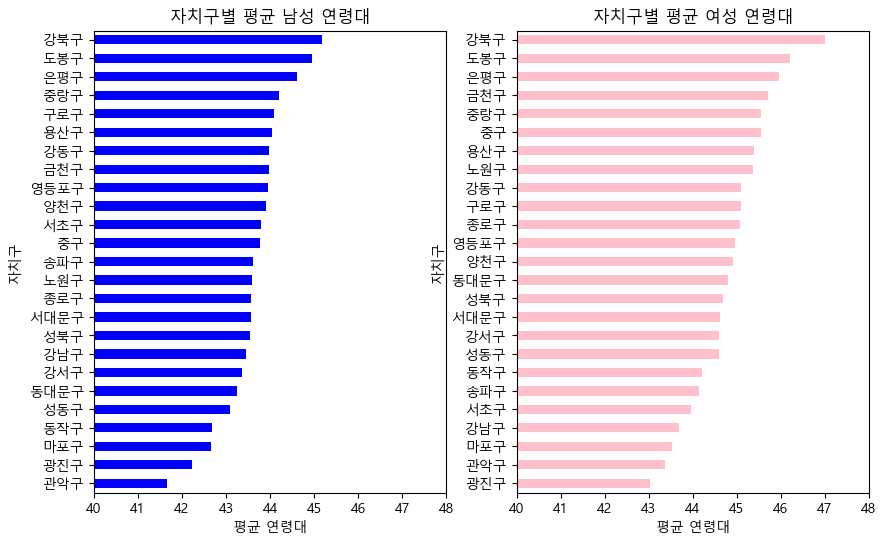

In [106]:
# 자치구별 평균 연령대 (남, 녀) 막대그래프
average_age = pd.read_excel('./average_age.xlsx')

plt.figure(figsize=(10,6))

plt.subplot(1, 2, 1)
male = average_age[average_age['성별'] == 'M'] # 남자 데이터만 추출한다.
average_age_region_m = male.groupby('자치구')['평균 연령대'].mean()
average_age_region_m.sort_values().plot(kind='barh', color='blue')
plt.title('자치구별 평균 남성 연령대')
plt.xlabel('평균 연령대')
plt.ylabel('자치구')
plt.xlim(40, 48)

plt.subplot(1, 2, 2)
female = average_age[average_age['성별'] == 'F'] # 여자 데이터만 추출한다.
average_age_region_f = female.groupby('자치구')['평균 연령대'].mean()
average_age_region_f.sort_values().plot(kind='barh', color='pink')
plt.title('자치구별 평균 여성 연령대')
plt.xlabel('평균 연령대')
plt.ylabel('자치구')
plt.xlim(40, 48)


<Figure size 1000x600 with 0 Axes>

<Axes: >

<Axes: ylabel='자치구'>

Text(0.5, 1.0, '자치구별 남성 총 인구 수')

Text(0.5, 0, '총인구수')

Text(0, 0.5, '자치구')

(2000.0, 13000.0)

<Axes: >

<Axes: ylabel='자치구'>

Text(0.5, 1.0, '자치구별 여성 총 인구 수')

Text(0.5, 0, '총인구수')

(2000.0, 13000.0)

Text(0, 0.5, '자치구')

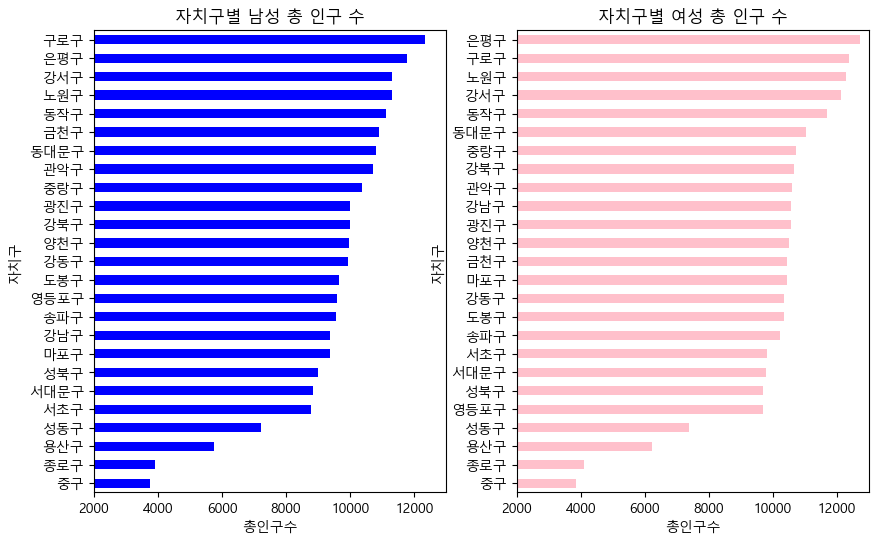

In [23]:
# 자치구별 총인구수 (남, 녀) 막대그래프
average_age = pd.read_excel('./average_age.xlsx')

plt.figure(figsize=(10,6))

plt.subplot(1, 2, 1)
male = average_age[average_age['성별'] == 'M'] # 남자 데이터만 추출한다.
total_region_m = male.groupby('자치구')['총인구수'].mean()
total_region_m.sort_values().plot(kind='barh', color='blue')
plt.title('자치구별 남성 총 인구 수')
plt.xlabel('총인구수')
plt.ylabel('자치구')
plt.xlim(2000, 13000)

plt.subplot(1, 2, 2)
female = average_age[average_age['성별'] == 'F'] # 여자 데이터만 추출한다.
total_region_f = female.groupby('자치구')['총인구수'].mean()
total_region_f.sort_values().plot(kind='barh', color='pink')
plt.title('자치구별 여성 총 인구 수')
plt.xlabel('총인구수')
plt.xlim(2000, 13000)
plt.ylabel('자치구')

## 평균 연령대 지도 시각화

In [95]:
import folium
import json
import re
from folium.features import DivIcon

average_age = pd.read_excel('./average_age.xlsx')
data = average_age[average_age['성별'] == 'M'] # 남자 데이터만 추출한다.
geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

m = folium.Map(
    location=[37.566345, 126.977893],
    zoom_start=10.5
)

folium.Choropleth(
    geo_data = geo_json,
    name = 'choropleth',
    data = data,
    columns = ['자치구','평균 연령대'],
    key_on = 'feature.properties.name',
    fill_color = 'PuBu',
    fill_opacity=0.7,
    line_opacity = 1,
    line_weight=1.5,
    line_color='#000',
    legend_name='자치구별 평균 연령대 (세)', 
).add_to(m)

m

In [96]:
average_age = pd.read_excel('./average_age.xlsx')
data = average_age[average_age['성별'] == 'F'] # 여자 데이터만 추출한다.
geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

m = folium.Map(
    location=[37.566345, 126.977893],
    zoom_start=10.5
)

folium.Choropleth(
    geo_data = geo_json,
    name = 'choropleth',
    data = data,
    columns = ['자치구','평균 연령대'],
    key_on = 'feature.properties.name',
    fill_color = 'PuRd',
    fill_opacity=0.7,
    line_opacity = 1,
    line_weight=1.5,
    line_color='#000',
    legend_name='자치구별 평균 연령대 (세)', 
).add_to(m)

m

## 총인구 수 지도 시각화

In [97]:
average_age = pd.read_excel('./average_age.xlsx')
data = average_age[average_age['성별'] == 'M'] # 남자 데이터만 추출한다.
geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

m = folium.Map(
    location=[37.566345, 126.977893],
    zoom_start=10.5
)

folium.Choropleth(
    geo_data = geo_json,
    name = 'choropleth',
    data = data,
    columns = ['자치구','총인구수'],
    key_on = 'feature.properties.name',
    fill_color = 'PuBu',
    fill_opacity=0.7,
    line_opacity = 1,
    line_weight=1.5,
    line_color='#000',
    legend_name='자치구별 총 인구수 (명)', 
).add_to(m)

m



In [98]:
average_age = pd.read_excel('./average_age.xlsx')
data = average_age[average_age['성별'] == 'F'] # 여자 데이터만 추출한다.
geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

f = folium.Map(
    location=[37.566345, 126.977893],
    zoom_start=10.5
)

folium.Choropleth(
    geo_data = geo_json,
    name = 'choropleth',
    data = data,
    columns = ['자치구','총인구수'],
    key_on = 'feature.properties.name',
    fill_color = 'PuRd',
    fill_opacity=0.7,
    line_opacity = 1,
    line_weight=1.5,
    line_color='#000',
    legend_name='자치구별 총 인구수 (명)', 
).add_to(f)


f

- 평균 연령대를 위에서 시각화 했을 때 자치구별 평균 연령대의 차이가 많이 나지 않기 때문에 다른 현황 분석 시각화가 필요함
- 연령대별(20, 30, ..., 70대)로 자치구별 총인구 수를 구해서 해당 연령대의 사람이 가장 많이 거주하는 지역을 시각화한다.

<Figure size 3000x1700 with 0 Axes>

Text(0.5, 0.98, '연령대별 자치구별 총인구 수')

<Axes: >

<Axes: ylabel='자치구'>

Text(0.5, 1.0, '자치구별 20 ~ 24세 총인구수')

Text(0, 0.5, '')

<Axes: >

<Axes: ylabel='자치구'>

Text(0.5, 1.0, '자치구별 25 ~ 29세 총인구수')

Text(0, 0.5, '')

<Axes: >

<Axes: ylabel='자치구'>

Text(0.5, 1.0, '자치구별 30 ~ 34세 총인구수')

Text(0, 0.5, '')

<Axes: >

<Axes: ylabel='자치구'>

Text(0.5, 1.0, '자치구별 35 ~ 39세 총인구수')

Text(0, 0.5, '')

<Axes: >

<Axes: ylabel='자치구'>

Text(0.5, 1.0, '자치구별 40 ~ 44세 총인구수')

Text(0, 0.5, '')

<Axes: >

<Axes: ylabel='자치구'>

Text(0.5, 1.0, '자치구별 45 ~ 49세 총인구수')

Text(0, 0.5, '')

<Axes: >

<Axes: ylabel='자치구'>

Text(0.5, 1.0, '자치구별 50 ~ 54세 총인구수')

Text(0, 0.5, '')

<Axes: >

<Axes: ylabel='자치구'>

Text(0.5, 1.0, '자치구별 55 ~ 59세 총인구수')

Text(0, 0.5, '')

<Axes: >

<Axes: ylabel='자치구'>

Text(0.5, 1.0, '자치구별 60 ~ 64세 총인구수')

Text(0, 0.5, '')

<Axes: >

<Axes: ylabel='자치구'>

Text(0.5, 1.0, '자치구별 65 ~ 69세 총인구수')

Text(0, 0.5, '')

<Axes: >

<Axes: ylabel='자치구'>

Text(0.5, 1.0, '자치구별 70 ~ 74세 총인구수')

Text(0, 0.5, '')

<Axes: >

<Axes: ylabel='자치구'>

Text(0.5, 1.0, '자치구별 75 ~ 79세 총인구수')

Text(0, 0.5, '')

<Figure size 3000x1700 with 0 Axes>

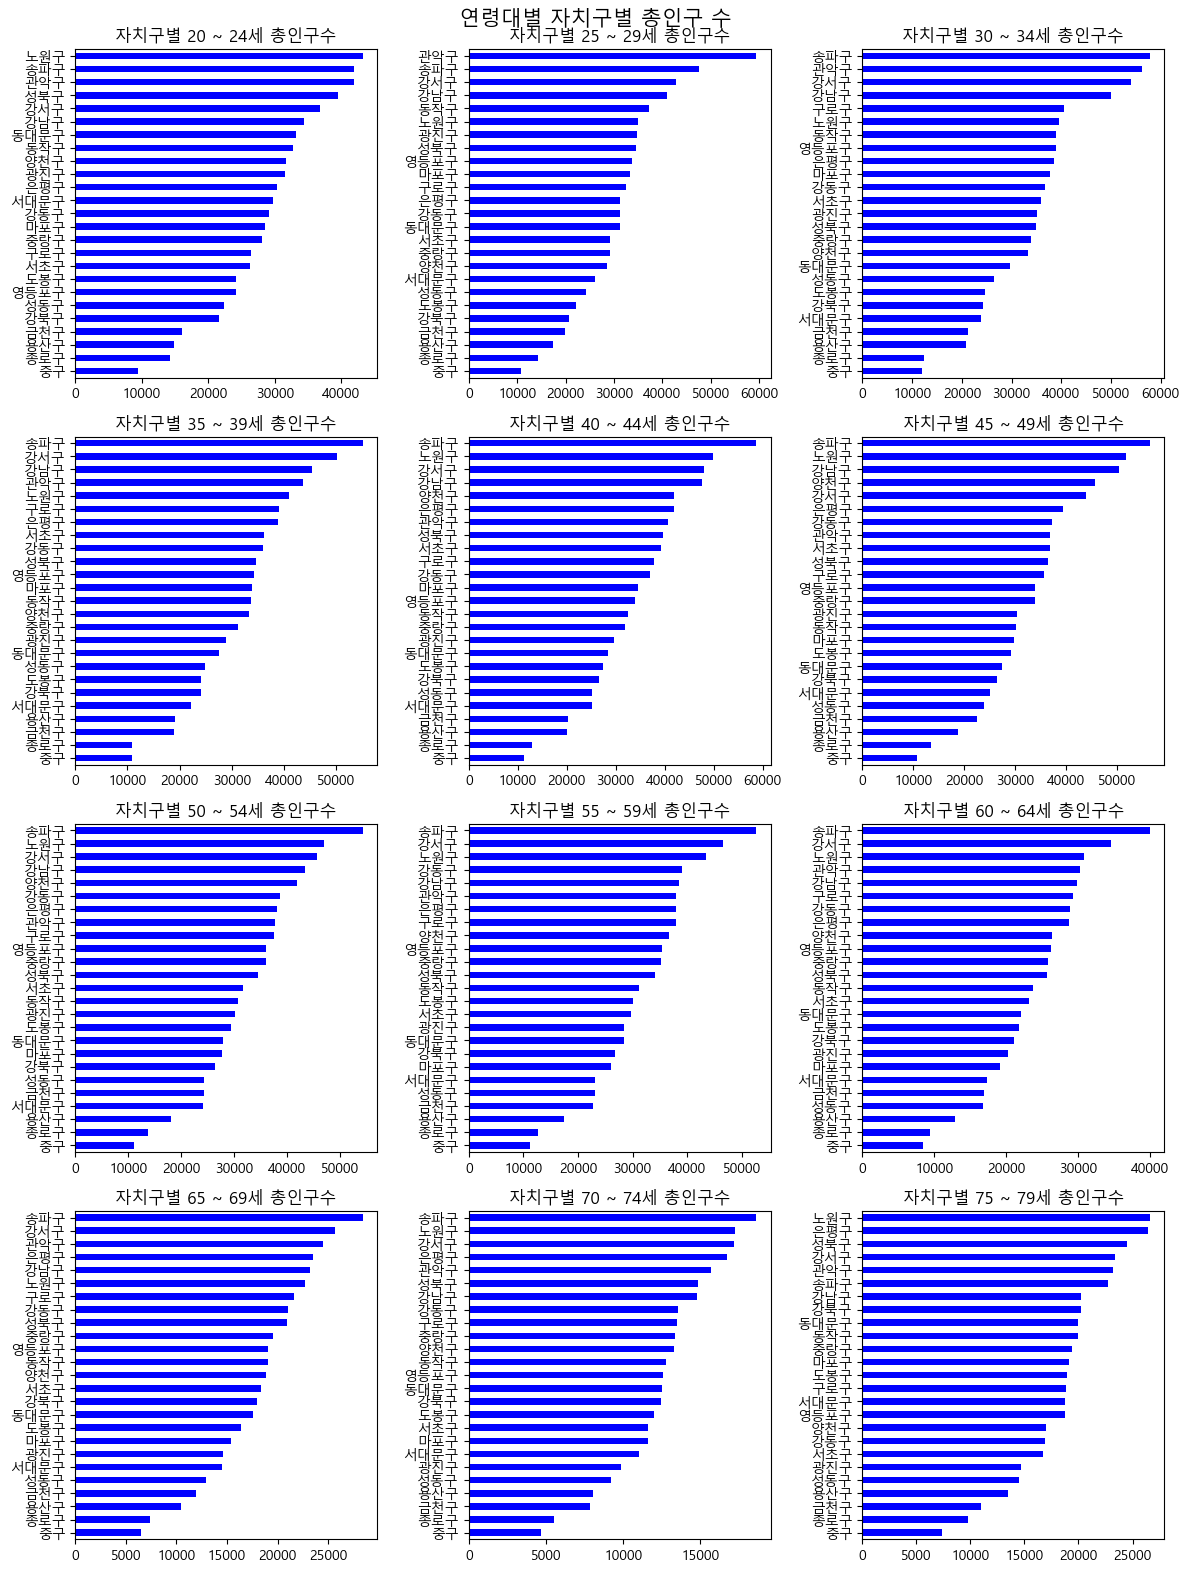

In [102]:
# 연령대 안나누고
data = pd.read_excel('./age_most_region.xlsx')

plt.figure(figsize=(30,17))


f, axes = plt.subplots(4, 3)
f.set_size_inches((12, 16))
plt.subplots_adjust(wspace = 0.15, hspace = 0.15)

# figure 전체 제목
f.suptitle('연령대별 자치구별 총인구 수', fontsize = 15)

plt.subplot(4, 3, 1)
age_20 = data[data['연령대'] == 20] # 20 ~ 24세 사이의 데이터만 추출한다.
total_region_20 = age_20.groupby('자치구')['총 인구수'].mean()
total_region_20 = total_region_20
total_region_20.sort_values().plot(kind='barh', color='blue')
plt.title('자치구별 20 ~ 24세 총인구수')
plt.ylabel('')

plt.subplot(4, 3, 2)
age_20 = data[data['연령대'] == 25] # 25 ~ 29세 사이의 데이터만 추출한다.
total_region_20 = age_20.groupby('자치구')['총 인구수'].mean()
total_region_20 = total_region_20
total_region_20.sort_values().plot(kind='barh', color='blue')
plt.title('자치구별 25 ~ 29세 총인구수')
plt.ylabel('')

plt.subplot(4, 3, 3)
age_20 = data[data['연령대'] == 30] # 30 ~ 34세 사이의 데이터만 추출한다.
total_region_20 = age_20.groupby('자치구')['총 인구수'].mean()
total_region_20 = total_region_20
total_region_20.sort_values().plot(kind='barh', color='blue')
plt.title('자치구별 30 ~ 34세 총인구수')
plt.ylabel('')

plt.subplot(4, 3, 4)
age_20 = data[data['연령대'] == 35] # 35 ~ 39세 사이의 데이터만 추출한다.
total_region_20 = age_20.groupby('자치구')['총 인구수'].mean()
total_region_20 = total_region_20
total_region_20.sort_values().plot(kind='barh', color='blue')
plt.title('자치구별 35 ~ 39세 총인구수')
plt.ylabel('')

plt.subplot(4, 3, 5)
age_20 = data[data['연령대'] == 40] # 40 ~ 44세 사이의 데이터만 추출한다.
total_region_20 = age_20.groupby('자치구')['총 인구수'].mean()
total_region_20 = total_region_20
total_region_20.sort_values().plot(kind='barh', color='blue')
plt.title('자치구별 40 ~ 44세 총인구수')
plt.ylabel('')

plt.subplot(4, 3, 6)
age_20 = data[data['연령대'] == 45] # 45 ~ 49세 사이의 데이터만 추출한다.
total_region_20 = age_20.groupby('자치구')['총 인구수'].mean()
total_region_20 = total_region_20
total_region_20.sort_values().plot(kind='barh', color='blue')
plt.title('자치구별 45 ~ 49세 총인구수')
plt.ylabel('')

plt.subplot(4, 3, 7)
age_20 = data[data['연령대'] == 50] # 50 ~ 54세 사이의 데이터만 추출한다.
total_region_20 = age_20.groupby('자치구')['총 인구수'].mean()
total_region_20 = total_region_20
total_region_20.sort_values().plot(kind='barh', color='blue')
plt.title('자치구별 50 ~ 54세 총인구수')
plt.ylabel('')

plt.subplot(4, 3, 8)
age_20 = data[data['연령대'] == 55] # 55 ~ 59세 사이의 데이터만 추출한다.
total_region_20 = age_20.groupby('자치구')['총 인구수'].mean()
total_region_20 = total_region_20
total_region_20.sort_values().plot(kind='barh', color='blue')
plt.title('자치구별 55 ~ 59세 총인구수')
plt.ylabel('')

plt.subplot(4, 3, 9)
age_20 = data[data['연령대'] == 60] # 60 ~ 64세 사이의 데이터만 추출한다.
total_region_20 = age_20.groupby('자치구')['총 인구수'].mean()
total_region_20 = total_region_20
total_region_20.sort_values().plot(kind='barh', color='blue')
plt.title('자치구별 60 ~ 64세 총인구수')
plt.ylabel('')

plt.subplot(4, 3, 10)
age_20 = data[data['연령대'] == 65] # 65 ~ 69세 사이의 데이터만 추출한다.
total_region_20 = age_20.groupby('자치구')['총 인구수'].mean()
total_region_20 = total_region_20
total_region_20.sort_values().plot(kind='barh', color='blue')
plt.title('자치구별 65 ~ 69세 총인구수')
plt.ylabel('')

plt.subplot(4, 3, 11)
age_20 = data[data['연령대'] == 70] # 70 ~ 74세 사이의 데이터만 추출한다.
total_region_20 = age_20.groupby('자치구')['총 인구수'].mean()
total_region_20 = total_region_20
total_region_20.sort_values().plot(kind='barh', color='blue')
plt.title('자치구별 70 ~ 74세 총인구수')
plt.ylabel('')

plt.subplot(4, 3, 12)
age_20 = data[data['연령대'] == 75] # 75 ~ 79세 사이의 데이터만 추출한다.
total_region_20 = age_20.groupby('자치구')['총 인구수'].mean()
total_region_20 = total_region_20
total_region_20.sort_values().plot(kind='barh', color='blue')
plt.title('자치구별 75 ~ 79세 총인구수')
plt.ylabel('')

plt.tight_layout()
plt.show()

Text(0.5, 0.98, '남성 연령대별 자치구별 총인구 수')

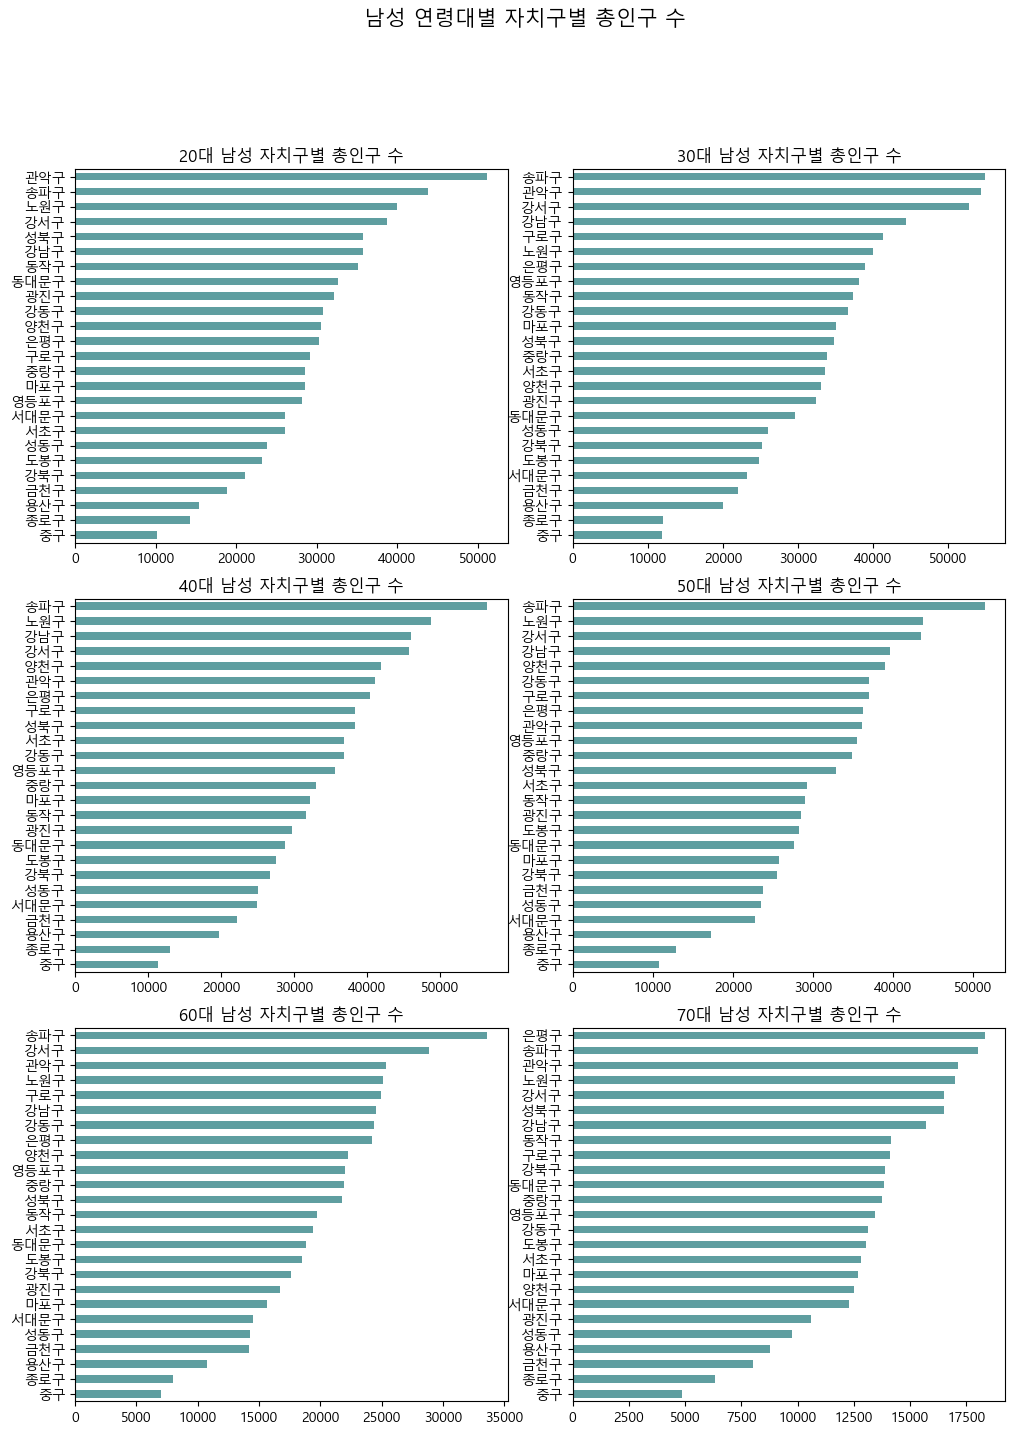

In [104]:
# 남성 연령대별 자치구별 총인구 수

data = pd.read_excel('./sex_age_10.xlsx')

f, axes = plt.subplots(3, 2)
f.set_size_inches((12, 16))
plt.subplots_adjust(wspace = 0.15, hspace = 0.15)

# figure 전체 제목
f.suptitle('남성 연령대별 자치구별 총인구 수', fontsize = 15)


def graph(i):
    plt.subplot(3, 2, i)
    male = data[(data['성별'] == 'M') & (data['연령대'] == (i+1)*10)] 
    total_region_m = male.groupby('자치구')['총 인구수'].mean().sort_values()

    total_region_m.plot(kind='barh', color='cadetblue')
    plt.title('{}0대 남성 자치구별 총인구 수'.format(i+1))
    plt.ylabel('')

for i in range(1, 7):
    graph(i)

Text(0.5, 0.98, '여성 연령대별 자치구별 총인구 수')

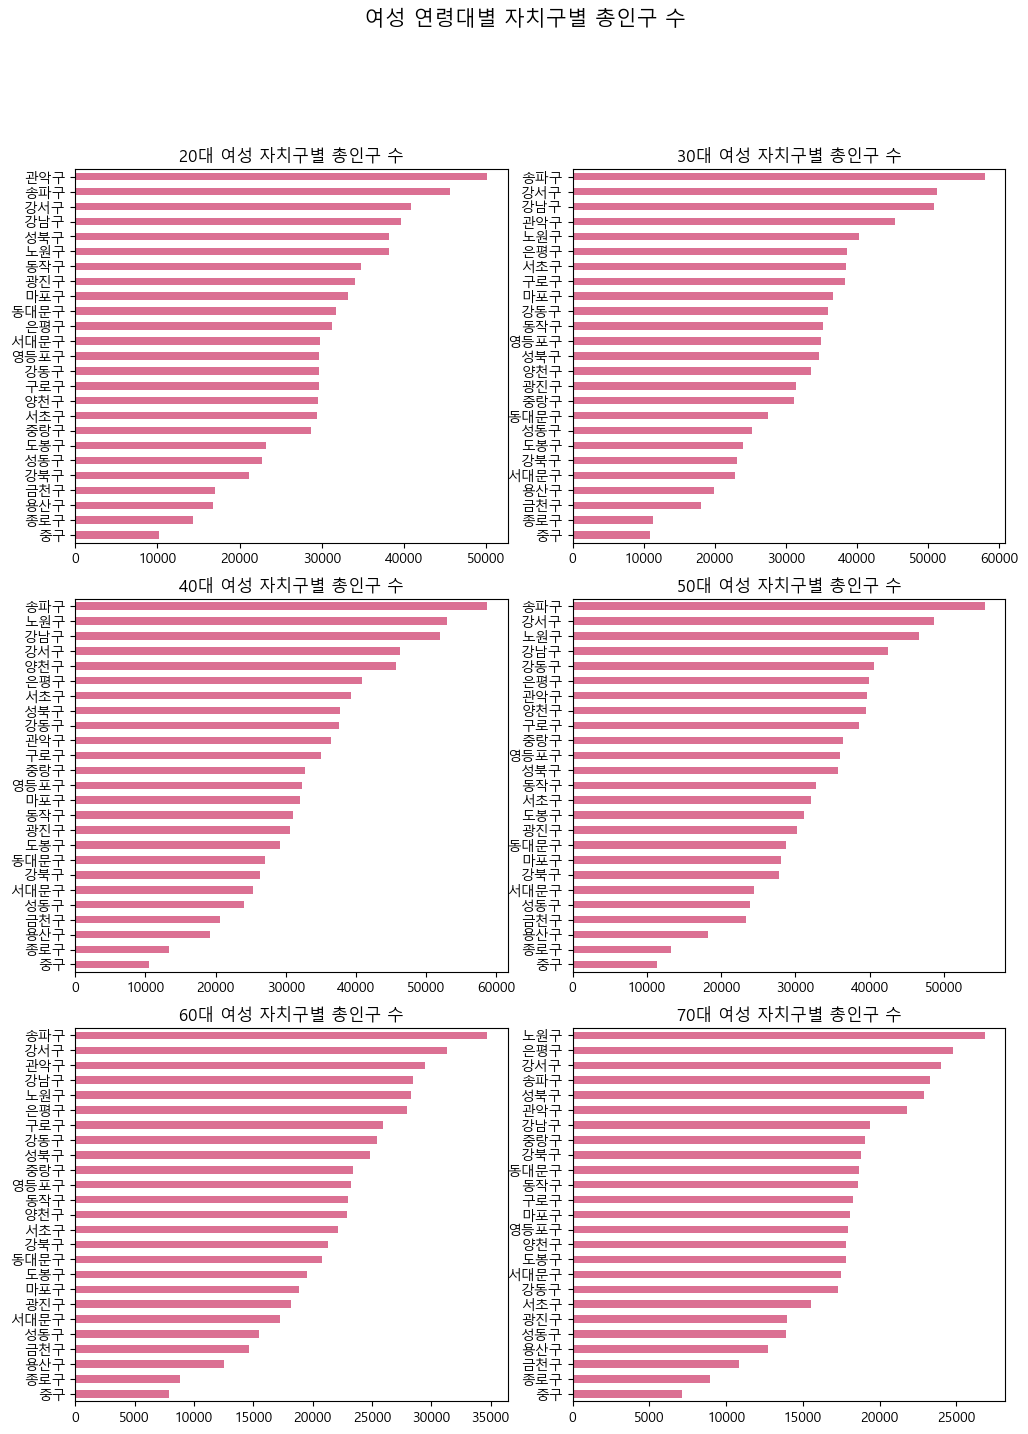

In [105]:
# 여성 연령대별 자치구별 총인구 수

data = pd.read_excel('./sex_age_10.xlsx')

f, axes = plt.subplots(3, 2)
f.set_size_inches((12, 16))
plt.subplots_adjust(wspace = 0.15, hspace = 0.15)

# figure 전체 제목
f.suptitle('여성 연령대별 자치구별 총인구 수', fontsize = 15)


def graph(i):
    plt.subplot(3, 2, i)
    female = data[(data['성별'] == 'F') & (data['연령대'] == (i+1)*10)] 
    total_region_m = female.groupby('자치구')['총 인구수'].mean().sort_values()

    total_region_m.plot(kind='barh', color='palevioletred')
    plt.title('{}0대 여성 자치구별 총인구 수'.format(i+1))
    plt.ylabel('')

for i in range(1, 7):
    graph(i)